In [1]:
from pylab import *
from utility_bfsolver3D import *
from utility_error import *

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=12)

tb = BFCalc3D_Toolbox()
er = BFCalc3D_Error()

# 1. Try One Case

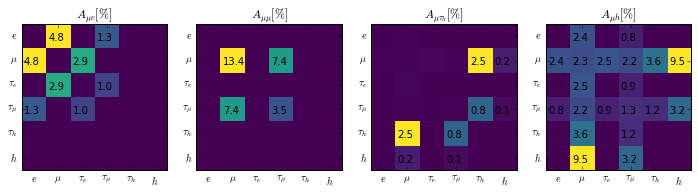

In [2]:
# defining bfCalc
trigger,tag = "mu","1b"
a,aVar         = tb.GetAcc  (trigger,tag)
ndata,ndataVar = tb.GetNData(trigger,tag)
nmcbg,nmcbgVar = tb.GetNMcbg(trigger,tag)
nfake,nfakeVar = tb.GetNFake(trigger,tag)

tb.Plot_Imshow4Matrix(a,trigger)
plt.savefig("../plot/acceptance/{}{}.png".format(trigger,tag),dpi=300)

In [2]:
trigger,tag = "mu","1b"
a,aVar  = tb.GetAcc  (trigger,tag)

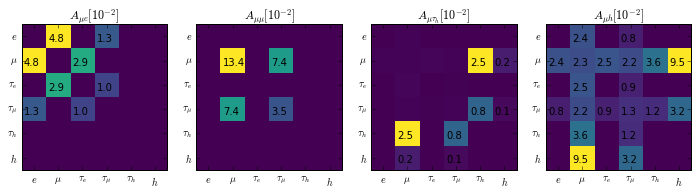

In [4]:
tb.Plot_Imshow4Matrix(a,trigger)

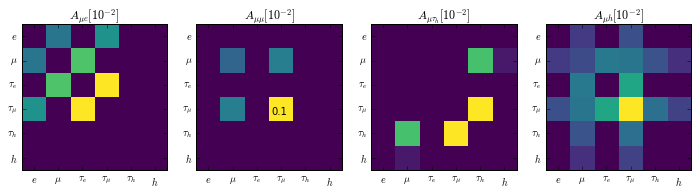

In [5]:
aVar[a<0.001]=np.zeros_like(a)[a<0.001]
tb.Plot_Imshow4Matrix(aVar**0.5,trigger)

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


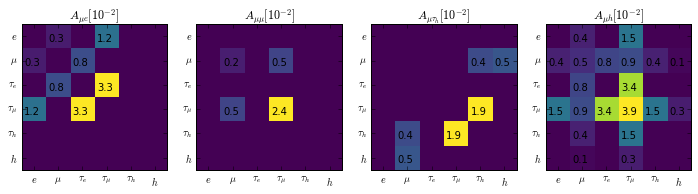

In [6]:
tb.Plot_Imshow4Matrix(np.nan_to_num(aVar**0.5/a),trigger)

In [4]:
temp = er.errStat(1000)
temp = np.abs(temp/0.1086 * 100)
np.sum(temp**(-2),axis=0)**(-0.5)

array([0.29634717, 0.28184639, 0.78909945])

# 2. Calculate Statistical Error

In [3]:
statistcal = [ er.errStat(1000,source) for source in ["data","mcbg","fake","mcsg"] ]

mcsg-e-2b: 100%|██████████| 1000/1000 [01:11<00:00, 13.37it/s]


In [8]:
er.errSystem_EnergyScale("tau")/0.1086 * 100

array([[ 0.40229504,  0.48908039, -2.48565574],
       [ 0.31409665,  0.37463005, -1.93937033],
       [ 0.37466265,  0.45376667, -2.44383467],
       [ 0.24556019,  0.30119163, -1.64007562]])

In [5]:
sysCrossSection = [ er.errSystem_CrossSection(source) for source in ["mcbg","fake","mcsg"] ]
sysObjectEff = [ er.errSystem_ObjectEff(source) for source in ["e","mu","tau"] ]
sysTTTheory = [ er.errSystem_TTTheory(source) for source in ["isr","fsr","","hdamp"] ]
sysEnergyScale = [ er.errSystem_EnergyScale(source) for source in ["e","mu","tau"] ]

In [4]:
statistcal = [
 array([[0.00058402, 0.00055003, 0.00130092],
        [0.00103828, 0.00093487, 0.00214739],
        [0.00075687, 0.00059557, 0.00156057],
        [0.00133172, 0.0010562 , 0.00264496]]),
 array([[6.65699161e-05, 1.54193609e-04, 3.31900887e-04],
        [5.42846597e-05, 1.19778399e-04, 2.26132506e-04],
        [1.90499846e-04, 7.88764421e-05, 3.58341288e-04],
        [1.78587239e-04, 7.38252247e-05, 3.11267909e-04]]),
 array([[2.98023477e-05, 3.45618739e-05, 1.54370483e-04],
        [3.91641100e-05, 4.38094278e-05, 1.95596779e-04],
        [4.85722573e-16, 6.24500451e-16, 7.21644966e-16],
        [1.19348975e-15, 7.63278329e-16, 1.48492330e-15]]),
 array([[0.00027522, 0.00023663, 0.00065389],
        [0.00046308, 0.00041302, 0.00085847],
        [0.00034975, 0.00028565, 0.00076679],
        [0.00060805, 0.00047613, 0.0010234 ]])
]
err = np.array(statistcal+sysCrossSection+sysObjectEff+sysTTTheory+sysEnergyScale).transpose(1,0,2)

In [5]:
error = np.abs(err/0.1086 * 100)

for i in range(error.shape[1]):
    print("{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f},{:5.3f}".format(error[0,i,0],error[0,i,1],error[0,i,2],
                                                                                                                   error[1,i,0],error[1,i,1],error[1,i,2],
                                                                                                                   error[2,i,0],error[2,i,1],error[2,i,2],
                                                                                                                   error[3,i,0],error[3,i,1],error[3,i,2]
                                                                                                                  ))
    

0.538,0.506,1.198,0.956,0.861,1.977,0.697,0.548,1.437,1.226,0.973,2.436
0.061,0.142,0.306,0.050,0.110,0.208,0.175,0.073,0.330,0.164,0.068,0.287
0.027,0.032,0.142,0.036,0.040,0.180,0.000,0.000,0.000,0.000,0.000,0.000
0.253,0.218,0.602,0.426,0.380,0.790,0.322,0.263,0.706,0.560,0.438,0.942
0.263,0.369,0.103,0.081,0.068,0.048,0.211,0.274,0.160,0.044,0.098,0.058
0.330,0.346,0.254,0.233,0.236,0.235,0.000,0.000,0.000,0.000,0.000,0.000
0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.005,0.093,0.073,1.023,0.094,0.071,1.063,0.110,0.084,1.024,0.104,0.080
0.132,1.157,0.118,0.124,1.062,0.106,0.107,1.028,0.103,0.110,1.033,0.101
1.417,1.723,8.755,1.217,1.452,7.516,1.368,1.657,8.922,1.156,1.418,7.720
0.081,0.082,0.098,0.086,0.089,0.041,0.054,0.127,0.172,0.048,0.139,0.092
0.044,0.053,0.379,0.040,0.071,0.223,0.025,0.123,0.291,0.009,0.104,0.079
0.024,0.094,0.129,0.025,0.092,0.133,0.049,0.031,0.045,0.054,0.030,0.034
0.008,0.004,0.037,0.009,0.005,0.034,0.135,0.073,0.111,0.140,0.07

# 3. Making Plot

In [5]:
for cata,cataname in enumerate(["mu1b","mu2b","e1b","e2b"]):
    #error = np.sum(err**(-2),axis=0)**(-0.5) 
    error = np.abs(err[cata])

    x = 0.1086 * np.ones_like(error)
    y = np.arange(error.shape[0])[::-1]*2
    plt.figure(figsize=(3,0.4*y.max()))

    plt.errorbar(x[:,0],y+0.3,xerr=error[:,0], fmt='.',color='C0')
    plt.errorbar(x[:,1],y-0.0,xerr=error[:,1], fmt='.',color='C1')
    plt.errorbar(x[:,2],y-0.3,xerr=error[:,2], fmt='.',color='C2')

    for i in range(error.shape[0]):
        plt.text(0.114,y[i]+0.4,"{:4.4f}".format(error[i,0]),fontsize=8,color='C0')
        plt.text(0.114,y[i]-0.1  ,"{:4.4f}".format(error[i,1]),fontsize=8,color='C1')
        plt.text(0.114,y[i]-0.6,"{:4.4f}".format(error[i,2]),fontsize=8,color='C2')

    plt.xlim(0.104,0.118)
    plt.ylim(-2,y.max()+2)
    #plt.axvline(x=0.1086,c="k")
    plt.yticks([])
    #plt.xticks([])
    plt.savefig("../plot/error/{}.png".format(cataname),dpi=300)
    plt.close()

# 4. Combined

In [19]:
error = np.abs(err/0.1086 * 100)
np.sum(error**(-2),axis=0)**(-0.5)

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


array([[3.70809106e-01, 3.22090628e-01, 7.89740684e-01],
       [3.75888452e-02, 4.28720846e-02, 1.34786307e-01],
       [6.92580214e-13, 1.33732553e-12, 5.01436022e-13],
       [1.71641179e-01, 1.47046163e-01, 3.66576389e-01],
       [4.09028181e-02, 5.40955896e-02, 3.41856825e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.19310778e-14, 0.00000000e+00],
       [5.16397710e-01, 5.01053319e-02, 3.83140890e-02],
       [5.82037963e-02, 5.33322495e-01, 5.33236819e-02],
       [6.63405390e-01, 7.70448793e-01, 4.08274955e+00],
       [3.10700549e-02, 5.07458271e-02, 3.44785080e-02],
       [8.06993159e-03, 3.73980525e-02, 7.13659413e-02],
       [1.58782275e-02, 2.00082333e-02, 2.57664141e-02],
       [6.10589801e-03, 3.11978340e-03, 2.35776166e-02]])

In [2]:
""+"up"

'up'

In [26]:
30*1.005

0.15